In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

1.11.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
print(train_images.shape)
print(train_labels.shape)
print(train_labels[0])

(60000, 28, 28)
(60000,)
9


## Show some sample images

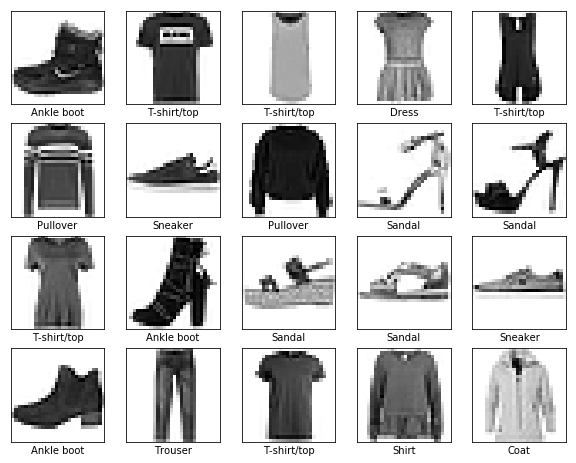

In [44]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([]) # do not show axis
    plt.yticks([]) # do not show axis
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [47]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [48]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
fit = model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
60000/60000 [==============================] - 19s 309us/step - loss: 0.4728 - acc: 0.8299
Epoch 2/5
60000/60000 [==============================] - 20s 330us/step - loss: 0.3571 - acc: 0.8692
Epoch 3/5
60000/60000 [==============================] - 20s 333us/step - loss: 0.3208 - acc: 0.8816
Epoch 4/5
60000/60000 [==============================] - 19s 320us/step - loss: 0.2982 - acc: 0.8896
Epoch 5/5
60000/60000 [==============================] - 18s 301us/step - loss: 0.2788 - acc: 0.8944


In [49]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_27 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_28 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [50]:
def plot_history_loss(fit, axL):
    # Plot the loss in the history
    axL.plot(fit.history['loss'],label="loss for training")
#     axL.plot(fit.history['val_loss'],label="loss for validation")
    axL.set_title('model loss')
    axL.set_xlabel('epoch')
    axL.set_ylabel('loss')
    axL.legend(loc='upper right')

# acc
def plot_history_acc(fit, axR):
    # Plot the loss in the history
    axR.plot(fit.history['acc'],label="loss for training")
#     axR.plot(fit.history['val_acc'],label="loss for validation")
    axR.set_title('model accuracy')
    axR.set_xlabel('epoch')
    axR.set_ylabel('accuracy')
    axR.legend(loc='upper right')

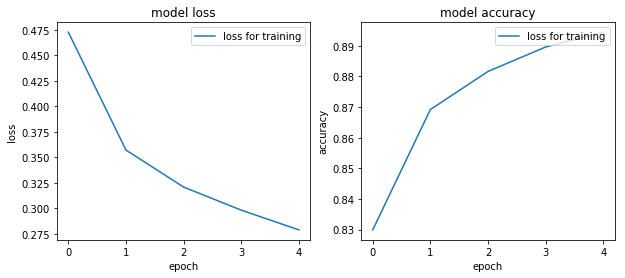

In [51]:
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
plot_history_loss(fit, axL)
plot_history_acc(fit, axR)

In [52]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 61us/step
Test accuracy: 0.8775


In [53]:
predictions = model.predict(test_images)
print(np.argmax(predictions[0]))
print(test_labels[0])

9
9


In [56]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    print(predictions_array)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

[3.6654507e-07 4.2157504e-09 4.5783409e-07 3.0135050e-07 9.9728496e-08
 6.5889341e-01 3.9735287e-08 3.4070006e-01 4.0288386e-04 2.2497763e-06]


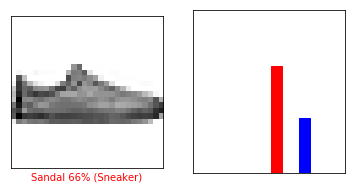

In [57]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()